In [1]:
import pandas as pd 
import geopandas as gpd

## Explication du process 

on merge la densité de population avec le revenu dans un csv 
ensuite on merge ce csv avec le geojson des secteurs de la ville

### 2.Récupération des infos de densité de population par secteur, changement de nom de colonnes et choix parmis celles qui nous intéressent

In [2]:
densite = pd.read_excel("..\data\densite_par_secteur.xlsx")
new_densite = densite[["CD_SECTOR","TOTAL","OPPERVLAKKTE IN HM²","CD_REFNIS"]]
new_densite.head()

,CD_SECTOR,TOTAL,OPPERVLAKKTE IN HM²,CD_REFNIS
0,11001A00-,2474,53.158956,11001
1,11001A01-,2805,67.115758,11001
2,11001A020,752,28.084816,11001
3,11001A030,441,42.812540,11001
4,11001A042,346,25.562366,11001


In [3]:
new_densite.rename(columns = {'TOTAL':'NOMBRE_HAB'}, inplace = True)
new_densite.rename(columns = {'OPPERVLAKKTE IN HM²':'DENSITE_PAR_HECTARE'}, inplace = True)

C:\Users\Décrypte\AppData\Local\Temp\ipykernel_21116\3025819748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_densite.rename(columns = {'TOTAL':'NOMBRE_HAB'}, inplace = True)
C:\Users\Décrypte\AppData\Local\Temp\ipykernel_21116\3025819748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_densite.rename(columns = {'OPPERVLAKKTE IN HM²':'DENSITE_PAR_HECTARE'}, inplace = True)


### 3. Récupération des données de revenus, changement de nom de colonnes et séléction de celle dont on a besoin 

In [4]:
revenu = pd.read_excel("../data/revenu_par_secteur.xlsx")
new_revenu = revenu[["CD_SECTOR","MS_AVG_TOT_NET_TAXABLE_INC","MS_MEDIAN_NET_TAXABLE_INC"]]
new_revenu.head()

,CD_SECTOR,MS_AVG_TOT_NET_TAXABLE_INC,MS_MEDIAN_NET_TAXABLE_INC
0,11001A00-,28979.0,21962.0
1,11001A01-,35113.0,25261.0
2,11001A020,37532.0,25591.0
3,11001A030,28876.0,22651.0
4,11001A042,63624.0,28844.0


In [5]:
new_revenu.rename(columns = {'MS_AVG_TOT_NET_TAXABLE_INC':'REVENU_MOYEN'}, inplace = True)
new_revenu.rename(columns = {'MS_MEDIAN_NET_TAXABLE_INC':'REVENU_MEDIAN'}, inplace = True)

C:\Users\Décrypte\AppData\Local\Temp\ipykernel_21116\3909679622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_revenu.rename(columns = {'MS_AVG_TOT_NET_TAXABLE_INC':'REVENU_MOYEN'}, inplace = True)
C:\Users\Décrypte\AppData\Local\Temp\ipykernel_21116\3909679622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_revenu.rename(columns = {'MS_MEDIAN_NET_TAXABLE_INC':'REVENU_MEDIAN'}, inplace = True)


### 4. Merge de la densité et du revenu sur la col du code du secteur

In [6]:
# précision du code NIS pour chaque commune
Liege = 62063
charleroi = 52011
mons = 53053
namur = 92094
tournai = 57081

In [7]:
revenu_densite = new_revenu.merge(new_densite, on="CD_SECTOR")
revenu_densite.head()

,CD_SECTOR,REVENU_MOYEN,REVENU_MEDIAN,NOMBRE_HAB,DENSITE_PAR_HECTARE,CD_REFNIS
0,11001A00-,28979.0,21962.0,2474,53.158956,11001
1,11001A00-,29689.0,22337.0,2474,53.158956,11001
2,11001A00-,31879.0,22409.0,2474,53.158956,11001
3,11001A00-,31803.0,23184.0,2474,53.158956,11001
4,11001A00-,32531.0,24239.0,2474,53.158956,11001


In [8]:

liege_gpd = revenu_densite.loc[revenu_densite["CD_REFNIS"] == 62063]
charleroi_gpd = revenu_densite.loc[revenu_densite["CD_REFNIS"] == charleroi]
mons_gpd = revenu_densite.loc[revenu_densite["CD_REFNIS"] == mons]
namur_gpd = revenu_densite.loc[revenu_densite["CD_REFNIS"] == namur]
tournai_gpd = revenu_densite.loc[revenu_densite["CD_REFNIS"] == tournai]
charleroi_gpd.shape

(4558, 6)

### Script pour export toutes les villes

In [17]:
sect= gpd.read_file(f"../assets/selection/charleroi_sel_centroid.geojson")
sect.rename(columns = {'cd_sector':'CD_SECTOR'}, inplace = True)
print(sect.shape)
print(charleroi_gpd.shape)
final = sect[["centroid_lon","centroid_lat", "raster_value", "tx_sector_descr_fr", "CD_SECTOR"]]
print(final.head())

# test = pd.merge(final, charleroi_gpd, how='left', on="CD_SECTOR")
# # test.to_file(f"../data/centroids/charleroi_centroids.geojson", driver="GeoJSON")
# print(test.shape)


(6338, 37)
(4558, 6)
   centroid_lon  centroid_lat  raster_value tx_sector_descr_fr  CD_SECTOR
0      4.456542     50.491876     37.191654            ROBESSE  52011P19-
1      4.458339     50.491876     35.840679            ROBESSE  52011P19-
2      4.454745     50.490733     35.779156            ROBESSE  52011P19-
3      4.456542     50.490733     38.166214            ROBESSE  52011P19-
4      4.458339     50.490733     34.960114            ROBESSE  52011P19-


In [68]:
ville = gpd.read_file(f"../assets/selection/charleroi_sel_centroid.geojson")
ville.rename(columns = {'cd_sector':'CD_SECTOR'}, inplace = True)
secteur_densite_revenu = pd.merge(ville, charleroi_gpd, how='left')
secteur_densite_revenu.to_file(f"../data/centroids/charleroi_centroids.geojson", driver="GeoJSON")
secteur_densite_revenu.shape()


KeyboardInterrupt: 

In [ ]:
ville = gpd.read_file(f"../assets/selection/liege_sel_centroid.geojson")
ville.rename(columns = {'cd_sector':'CD_SECTOR'}, inplace = True)
secteur_densite_revenu = pd.merge(ville, liege_gpd, how='left')
secteur_densite_revenu.to_file(f"../data/centroids/liege_centroids.geojson", driver="GeoJSON")


In [ ]:
ville = gpd.read_file(f"../assets/selection/mons_sel_centroid.geojson")
ville.rename(columns = {'cd_sector':'CD_SECTOR'}, inplace = True)
secteur_densite_revenu = pd.merge(ville, mons_gpd, how='left')
secteur_densite_revenu.to_file(f"../data/centroids/mons_centroids.geojson", driver="GeoJSON")


In [ ]:
ville = gpd.read_file(f"../assets/selection/namur_sel_centroid.geojson")
ville.rename(columns = {'cd_sector':'CD_SECTOR'}, inplace = True)
secteur_densite_revenu = pd.merge(ville, namur_gpd, how='left')
secteur_densite_revenu.to_file(f"../data/centroids/namur_centroids.geojson", driver="GeoJSON")


KeyboardInterrupt: 

In [ ]:
ville = gpd.read_file(f"../assets/selection/tournai_sel_centroid.geojson")
ville.rename(columns = {'cd_sector':'CD_SECTOR'}, inplace = True)
secteur_densite_revenu = pd.merge(ville, tournai_gpd, how='left')
secteur_densite_revenu.to_file(f"../data/centroids/tournai_centroids.geojson", driver="GeoJSON")


In [ ]:
import geopandas as gpd
list_ville = ["charleroi", "liege", "mons", "namur", "tournai"]

for city in list_ville : 
    ville = gpd.read_file(f"../assets/selection/{city}_sel_centroid.geojson")
    print(ville.shape)
    ville.rename(columns = {'cd_sector':'CD_SECTOR'}, inplace = True)

    secteur_densite_revenu = ville.merge(liege_gpd, on="CD_SECTOR")
    print(secteur_densite_revenu.shape)
    final = secteur_densite_revenu[["centroid_lon","centroid_lat", "raster_value", "tx_sector_descr_fr", "REVENU_MOYEN", "REVENU_MEDIAN","NOMBRE_HAB","geometry"]]

    print(final.shape)
    # final = secteur_densite_revenu.to_crs("EPSG:4326")
    # final_2 = final.to_crs("wgs84")

    final.to_file(f"../data/centroids/{city}_centroids.geojson", driver="GeoJSON")

(6338, 37)
(97777, 41)
(97777, 8)
(4256, 37)
(66588, 41)
(66588, 8)
(9075, 37)
(142364, 41)
(142364, 8)
(10833, 37)
(171137, 41)
(171137, 8)
(13220, 37)
(211493, 41)
(211493, 8)


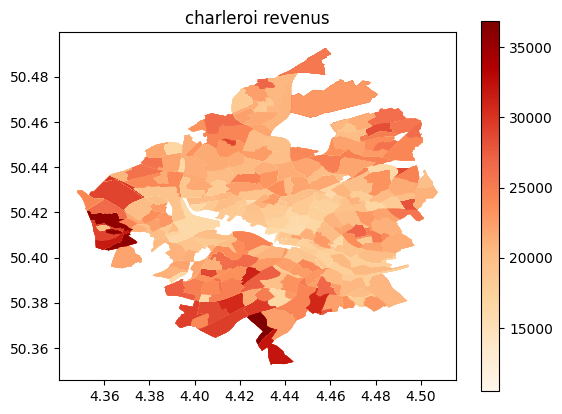

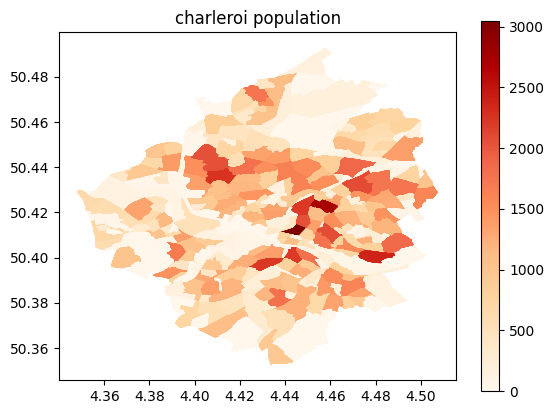

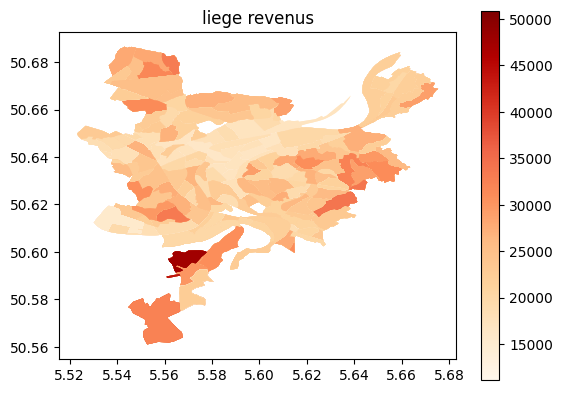

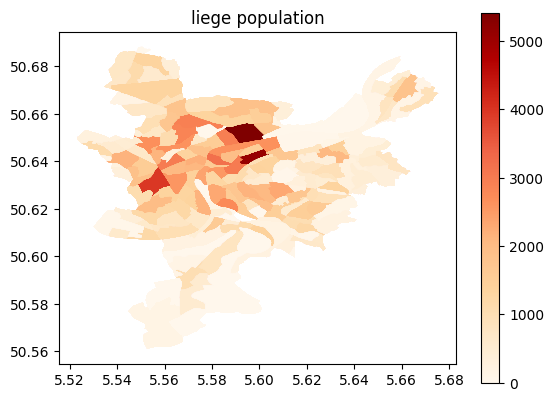

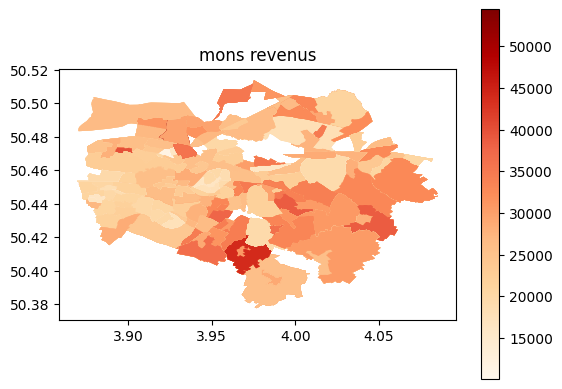

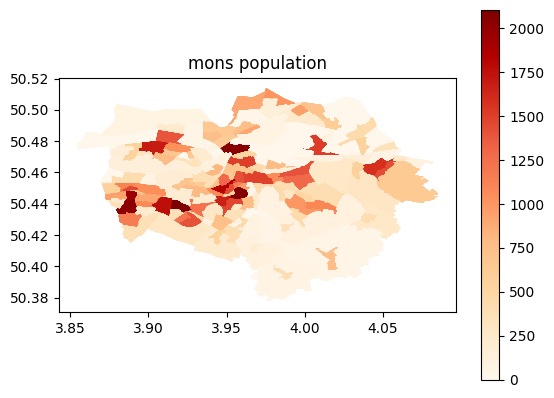

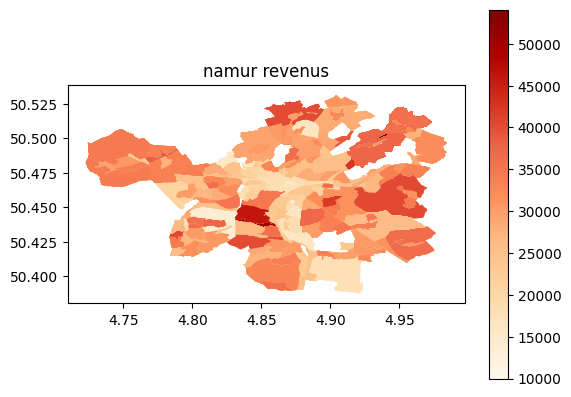

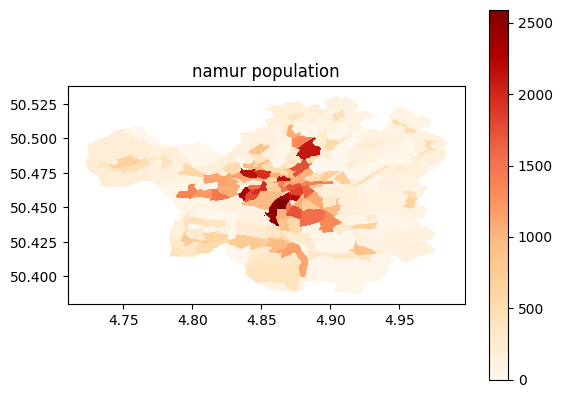

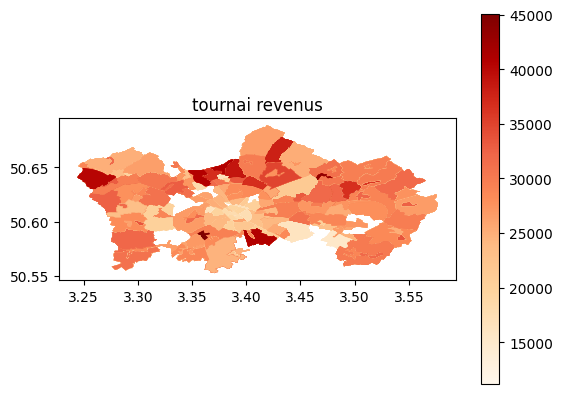

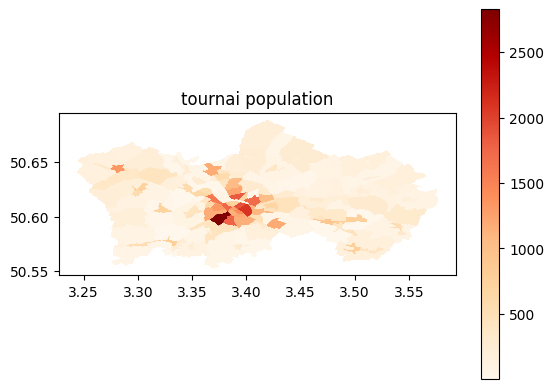

In [ ]:
list_ville = ["charleroi", "liege", "mons", "namur", "tournai"]

for city in list_ville : 
    ville = gpd.read_file(f"../data/secteurs/{city}_secteur.geojson")
    ville.rename(columns = {'cd_sector':'CD_SECTOR'}, inplace = True)
    ville.head()

    secteur_densite_revenu = ville.merge(revenu_densite, on="CD_SECTOR")
    secteur_densite_revenu.head()

    ax = secteur_densite_revenu.plot(aspect=1,column="REVENU_MEDIAN",legend=True, cmap="OrRd")
    ax.set_title(f"{city} revenus")
    ax2 = secteur_densite_revenu.plot(aspect=1,column="NOMBRE_HAB",legend=True, cmap="OrRd")
    ax2.set_title(f"{city} population")

    
    # final = secteur_densite_revenu.to_crs("EPSG:4326")
    # final_2 = final.to_crs("wgs84")

    secteur_densite_revenu.to_file(f"../data/revenu_densite_geojson/{city}_revenu_densite.geojson", driver="GeoJSON")

<Axes: >

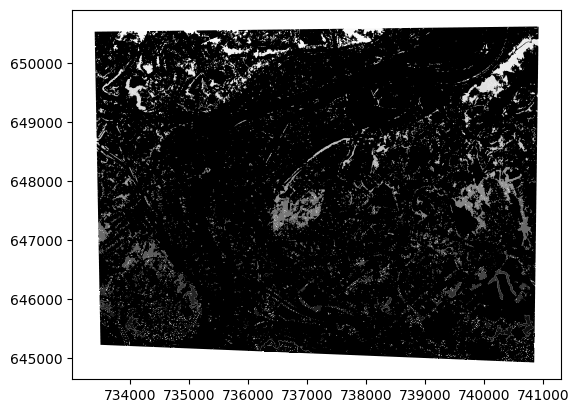

In [ ]:
ville = gpd.read_file(f"../data/test.geojson")

ville.plot(aspect=1, cmap="Greys")